In [95]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # fancy graphs

In [96]:
# Load dataset
dataframe = pd.read_csv('/kaggle/input/ground-water-quality-data/ground_water_quality_data.csv')

In [97]:
# Print all columns in dataset
print(list(dataframe.columns))

['district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L', 'Classification.1']


In [98]:
# Display rows of the dataset
dataframe.head().T

,0,1,2,3,4
district,ADILABAD,ADILABAD,ADILABAD,ADILABAD,ADILABAD
mandal,Adilabad,Bazarhatnur,Gudihatnoor,Jainath,Narnoor
village,Adilabad,Bazarhatnur,Gudihatnoor,Jainath,Narnoor
lat_gis,19.6683,19.458888,19.525555,19.730555,19.495665
long_gis,78.5247,78.350833,78.512222,78.64,78.852654
gwl,5.09,5.1,4.98,5.75,2.15
pH,8.28,8.29,7.69,8.09,8.21
E.C,745,921,510,422,2321
TDS,476.8,589.44,326.4,270.08,1485.44
CO3,0.0,0.0,0.0,0.0,0.0


In [99]:
# Display data types of each column
dataframe.dtypes

district             object
mandal               object
village              object
lat_gis             float64
long_gis            float64
gwl                 float64
pH                   object
E.C                   int64
TDS                 float64
CO3                 float64
HCO3                float64
Cl                    int64
F                   float64
NO3                 float64
SO4                 float64
Na                  float64
K                   float64
Ca                  float64
Mg                  float64
T.H                 float64
SAR                 float64
Classification       object
RSC  meq  / L       float64
Classification.1     object
dtype: object

In [100]:
# Correct value at position 635
dataframe.at[635, 'pH'] = 8.05

In [101]:
# Correct pH column from object type to float64
dataframe['pH'] = pd.to_numeric(dataframe['pH'])

In [102]:
# Display general information about the dataset
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          742 non-null    object 
 1   mandal            742 non-null    object 
 2   village           742 non-null    object 
 3   lat_gis           742 non-null    float64
 4   long_gis          742 non-null    float64
 5   gwl               736 non-null    float64
 6   pH                742 non-null    float64
 7   E.C               742 non-null    int64  
 8   TDS               742 non-null    float64
 9   CO3               742 non-null    float64
 10  HCO3              742 non-null    float64
 11  Cl                742 non-null    int64  
 12  F                 742 non-null    float64
 13  NO3               742 non-null    float64
 14  SO4               742 non-null    float64
 15  Na                742 non-null    float64
 16  K                 742 non-null    float64
 1

In [103]:
# Calculate mean of 'gwl' column values and fill missing values
gwl_mean = dataframe['gwl'].mean()

dataframe.fillna(gwl_mean, inplace=True)

In [104]:
# Display general information about the dataset after changes
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          742 non-null    object 
 1   mandal            742 non-null    object 
 2   village           742 non-null    object 
 3   lat_gis           742 non-null    float64
 4   long_gis          742 non-null    float64
 5   gwl               742 non-null    float64
 6   pH                742 non-null    float64
 7   E.C               742 non-null    int64  
 8   TDS               742 non-null    float64
 9   CO3               742 non-null    float64
 10  HCO3              742 non-null    float64
 11  Cl                742 non-null    int64  
 12  F                 742 non-null    float64
 13  NO3               742 non-null    float64
 14  SO4               742 non-null    float64
 15  Na                742 non-null    float64
 16  K                 742 non-null    float64
 1

In [105]:
# Display summary statistics for numeric columns
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
lat_gis,742.0,17.704869,0.852004,15.896441,17.135000,17.632227,18.358626,19.730555
long_gis,742.0,78.793392,0.817355,77.444000,78.189200,78.588964,79.351937,80.920000
gwl,742.0,8.708003,7.704538,0.170000,3.082500,5.985000,12.390000,43.170000
pH,742.0,7.867210,0.459254,6.280000,7.530000,7.890000,8.190000,10.440000
E.C,742.0,1362.229111,889.211708,212.000000,777.500000,1173.500000,1660.250000,9499.000000
TDS,742.0,871.826631,569.095493,135.680000,497.600000,751.040000,1062.560000,6079.360000
CO3,742.0,6.204898,16.473540,0.000000,0.000000,0.000000,0.000000,100.000000
HCO3,742.0,294.152543,131.888934,30.000000,198.376340,283.013486,370.000000,1070.000000
Cl,742.0,196.239892,212.617545,10.000000,60.000000,130.000000,260.000000,2480.000000
F,742.0,1.128636,0.819932,0.043100,0.610000,0.930000,1.397500,7.700000


In [106]:
# Display disrict column statistics summary
dataframe['district'].value_counts()

district
NALGONDA             73
NIZAMABAD            46
KAMAREDDY            42
RANGAREDDY           37
MEDAK                37
VIKARABAD            32
KHAMMAM              30
BHADRADRI            30
JAGITYAL             28
YADADRI              28
NAGARKURNOOL         24
MAHABUBNAGAR         24
SANGAREDDY           22
NIRMAL               22
JOGULAMBA(GADWAL)    21
WARANGAL (R)         21
NARAYANPET           19
ADILABAD             18
MAHABUBABAD          16
HYDERABAD            16
SIDDIPET             15
MEDCHAL              14
JANGAON              14
SURYAPET             14
WANAPARTHY           14
WARANGAL (U)         13
MANCHERIAL           12
KUMURAM BHEEM        12
SIRCILLA             12
PEDDAPALLY           10
KARIMNAGAR           10
BHUPALPALLY           8
MULUGU                8
Name: count, dtype: int64

In [107]:
# Normalize parameter to find out the percentage of each class
dataframe['district'].value_counts(normalize=True)

district
NALGONDA             0.098383
NIZAMABAD            0.061995
KAMAREDDY            0.056604
RANGAREDDY           0.049865
MEDAK                0.049865
VIKARABAD            0.043127
KHAMMAM              0.040431
BHADRADRI            0.040431
JAGITYAL             0.037736
YADADRI              0.037736
NAGARKURNOOL         0.032345
MAHABUBNAGAR         0.032345
SANGAREDDY           0.029650
NIRMAL               0.029650
JOGULAMBA(GADWAL)    0.028302
WARANGAL (R)         0.028302
NARAYANPET           0.025606
ADILABAD             0.024259
MAHABUBABAD          0.021563
HYDERABAD            0.021563
SIDDIPET             0.020216
MEDCHAL              0.018868
JANGAON              0.018868
SURYAPET             0.018868
WANAPARTHY           0.018868
WARANGAL (U)         0.017520
MANCHERIAL           0.016173
KUMURAM BHEEM        0.016173
SIRCILLA             0.016173
PEDDAPALLY           0.013477
KARIMNAGAR           0.013477
BHUPALPALLY          0.010782
MULUGU               0.010782
N

In [108]:
# Display mandal column statistics summary
dataframe['mandal'].value_counts()

mandal
Anumula               8
Rajapet               7
CC Kunta              6
Nalgonda              6
Chandur               6
                     ..
Wargal                1
Bheemadevarapallly    1
Nekkonda              1
Regode                1
Bibinagar             1
Name: count, Length: 316, dtype: int64

In [109]:
# Normalize parameter to find out the percentage of each class
dataframe['mandal'].value_counts(normalize=True)

mandal
Anumula               0.010782
Rajapet               0.009434
CC Kunta              0.008086
Nalgonda              0.008086
Chandur               0.008086
                        ...   
Wargal                0.001348
Bheemadevarapallly    0.001348
Nekkonda              0.001348
Regode                0.001348
Bibinagar             0.001348
Name: proportion, Length: 316, dtype: float64

In [110]:
# Display village column statistics summary
dataframe['village'].value_counts()

village
Khanapur          4
Kanchanapalli     4
Kallur            4
Tandur            4
Angadipet         4
                 ..
Kondapur          1
Qutubullapur 2    1
Majidpalli        1
Vangara           1
Kurraram          1
Name: count, Length: 371, dtype: int64

In [111]:
# Normalize parameter to find out the percentage of each class
dataframe['village'].value_counts(normalize=True)

village
Khanapur          0.005391
Kanchanapalli     0.005391
Kallur            0.005391
Tandur            0.005391
Angadipet         0.005391
                    ...   
Kondapur          0.001348
Qutubullapur 2    0.001348
Majidpalli        0.001348
Vangara           0.001348
Kurraram          0.001348
Name: proportion, Length: 371, dtype: float64

In [112]:
# Check for missing values
dataframe.isnull().sum()

district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

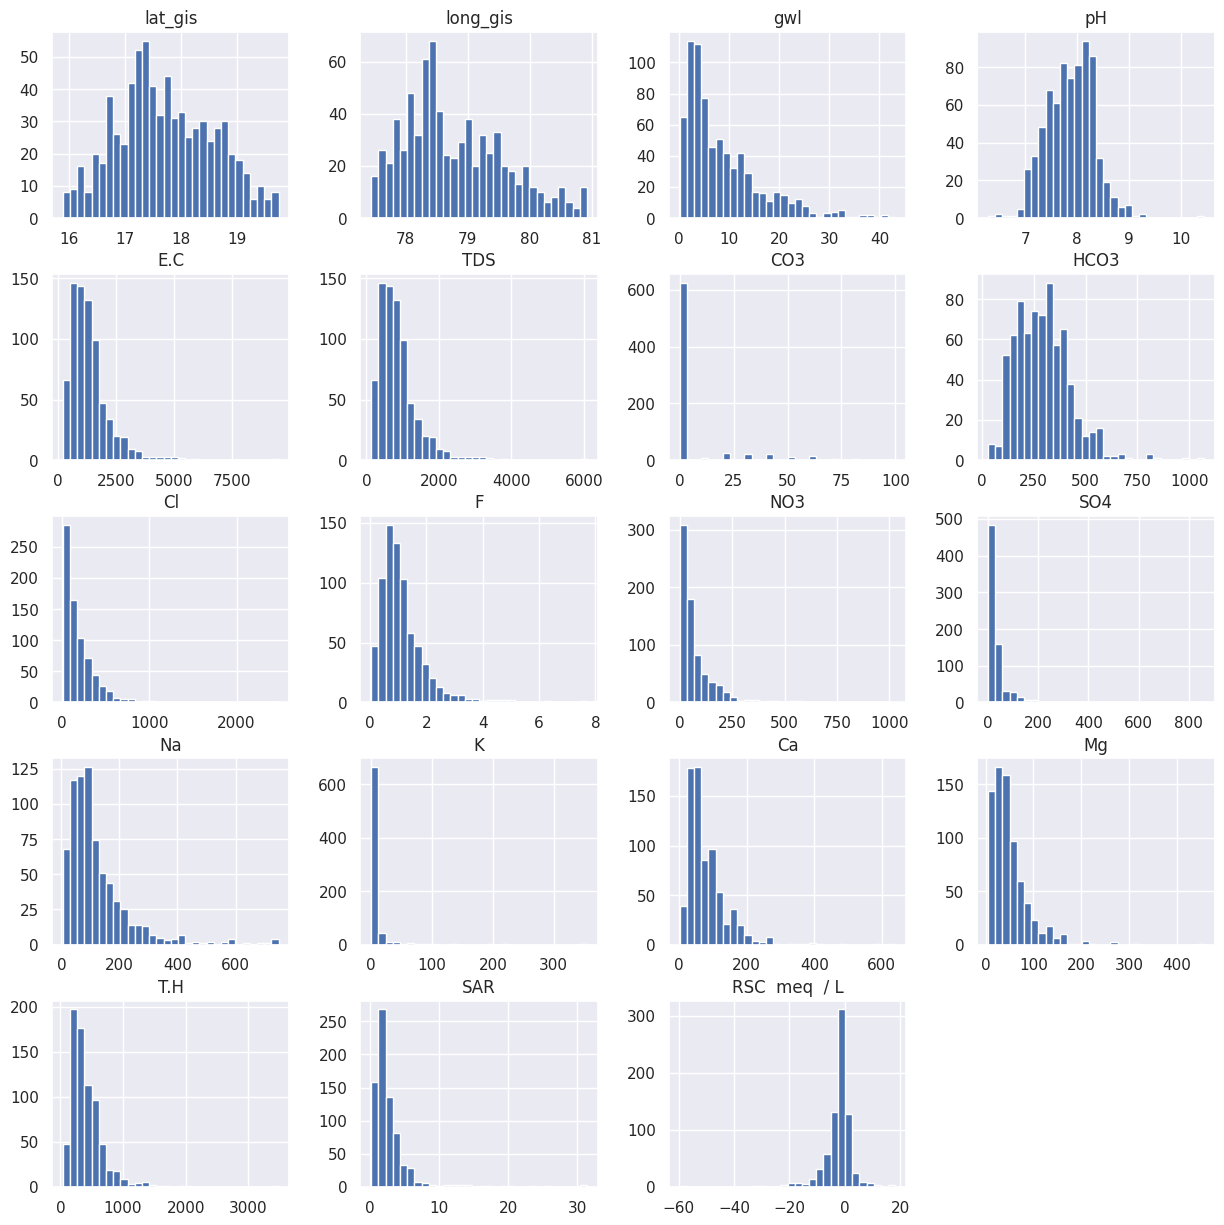

In [113]:
# Histograms for numeric variables
dataframe.hist(figsize=(15,15), bins=30)
plt.show()

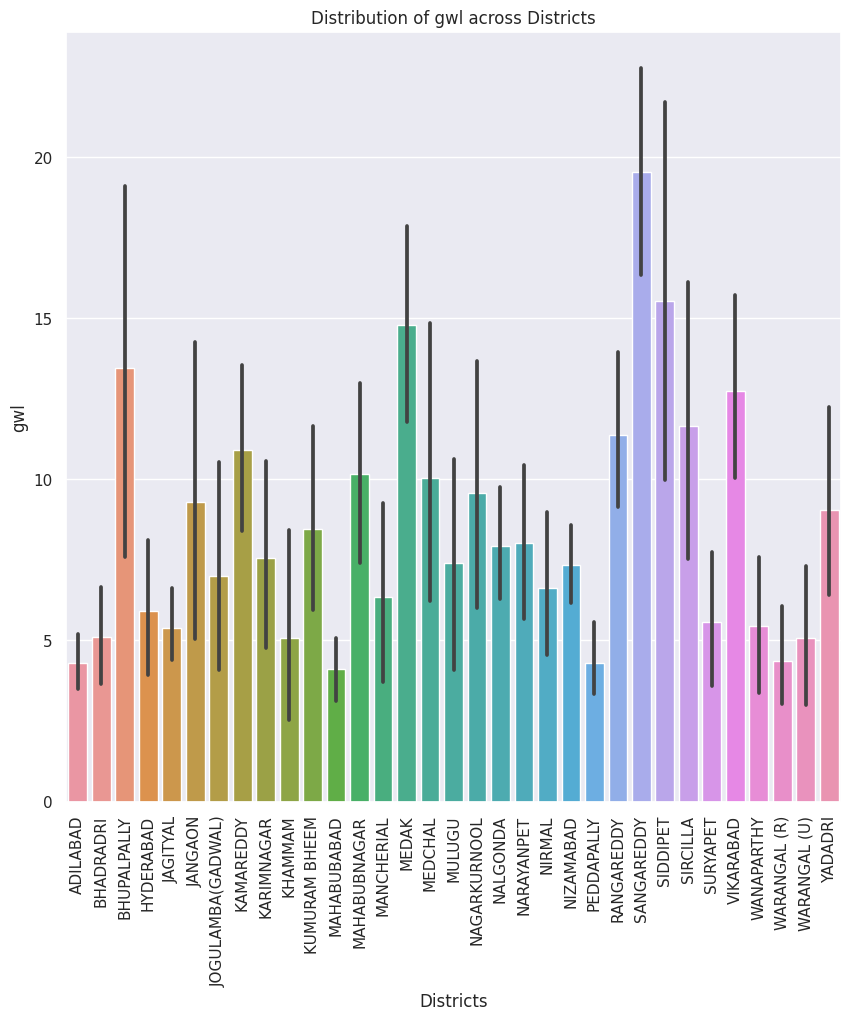

In [114]:
plt.figure(figsize=(10,10))
sns.barplot(data=dataframe, x="district", y="gwl")
plt.title(f'Distribution of {y_var} across Districts')
plt.xlabel('Districts')
plt.ylabel(y_var)
plt.xticks(rotation=90)
plt.show()

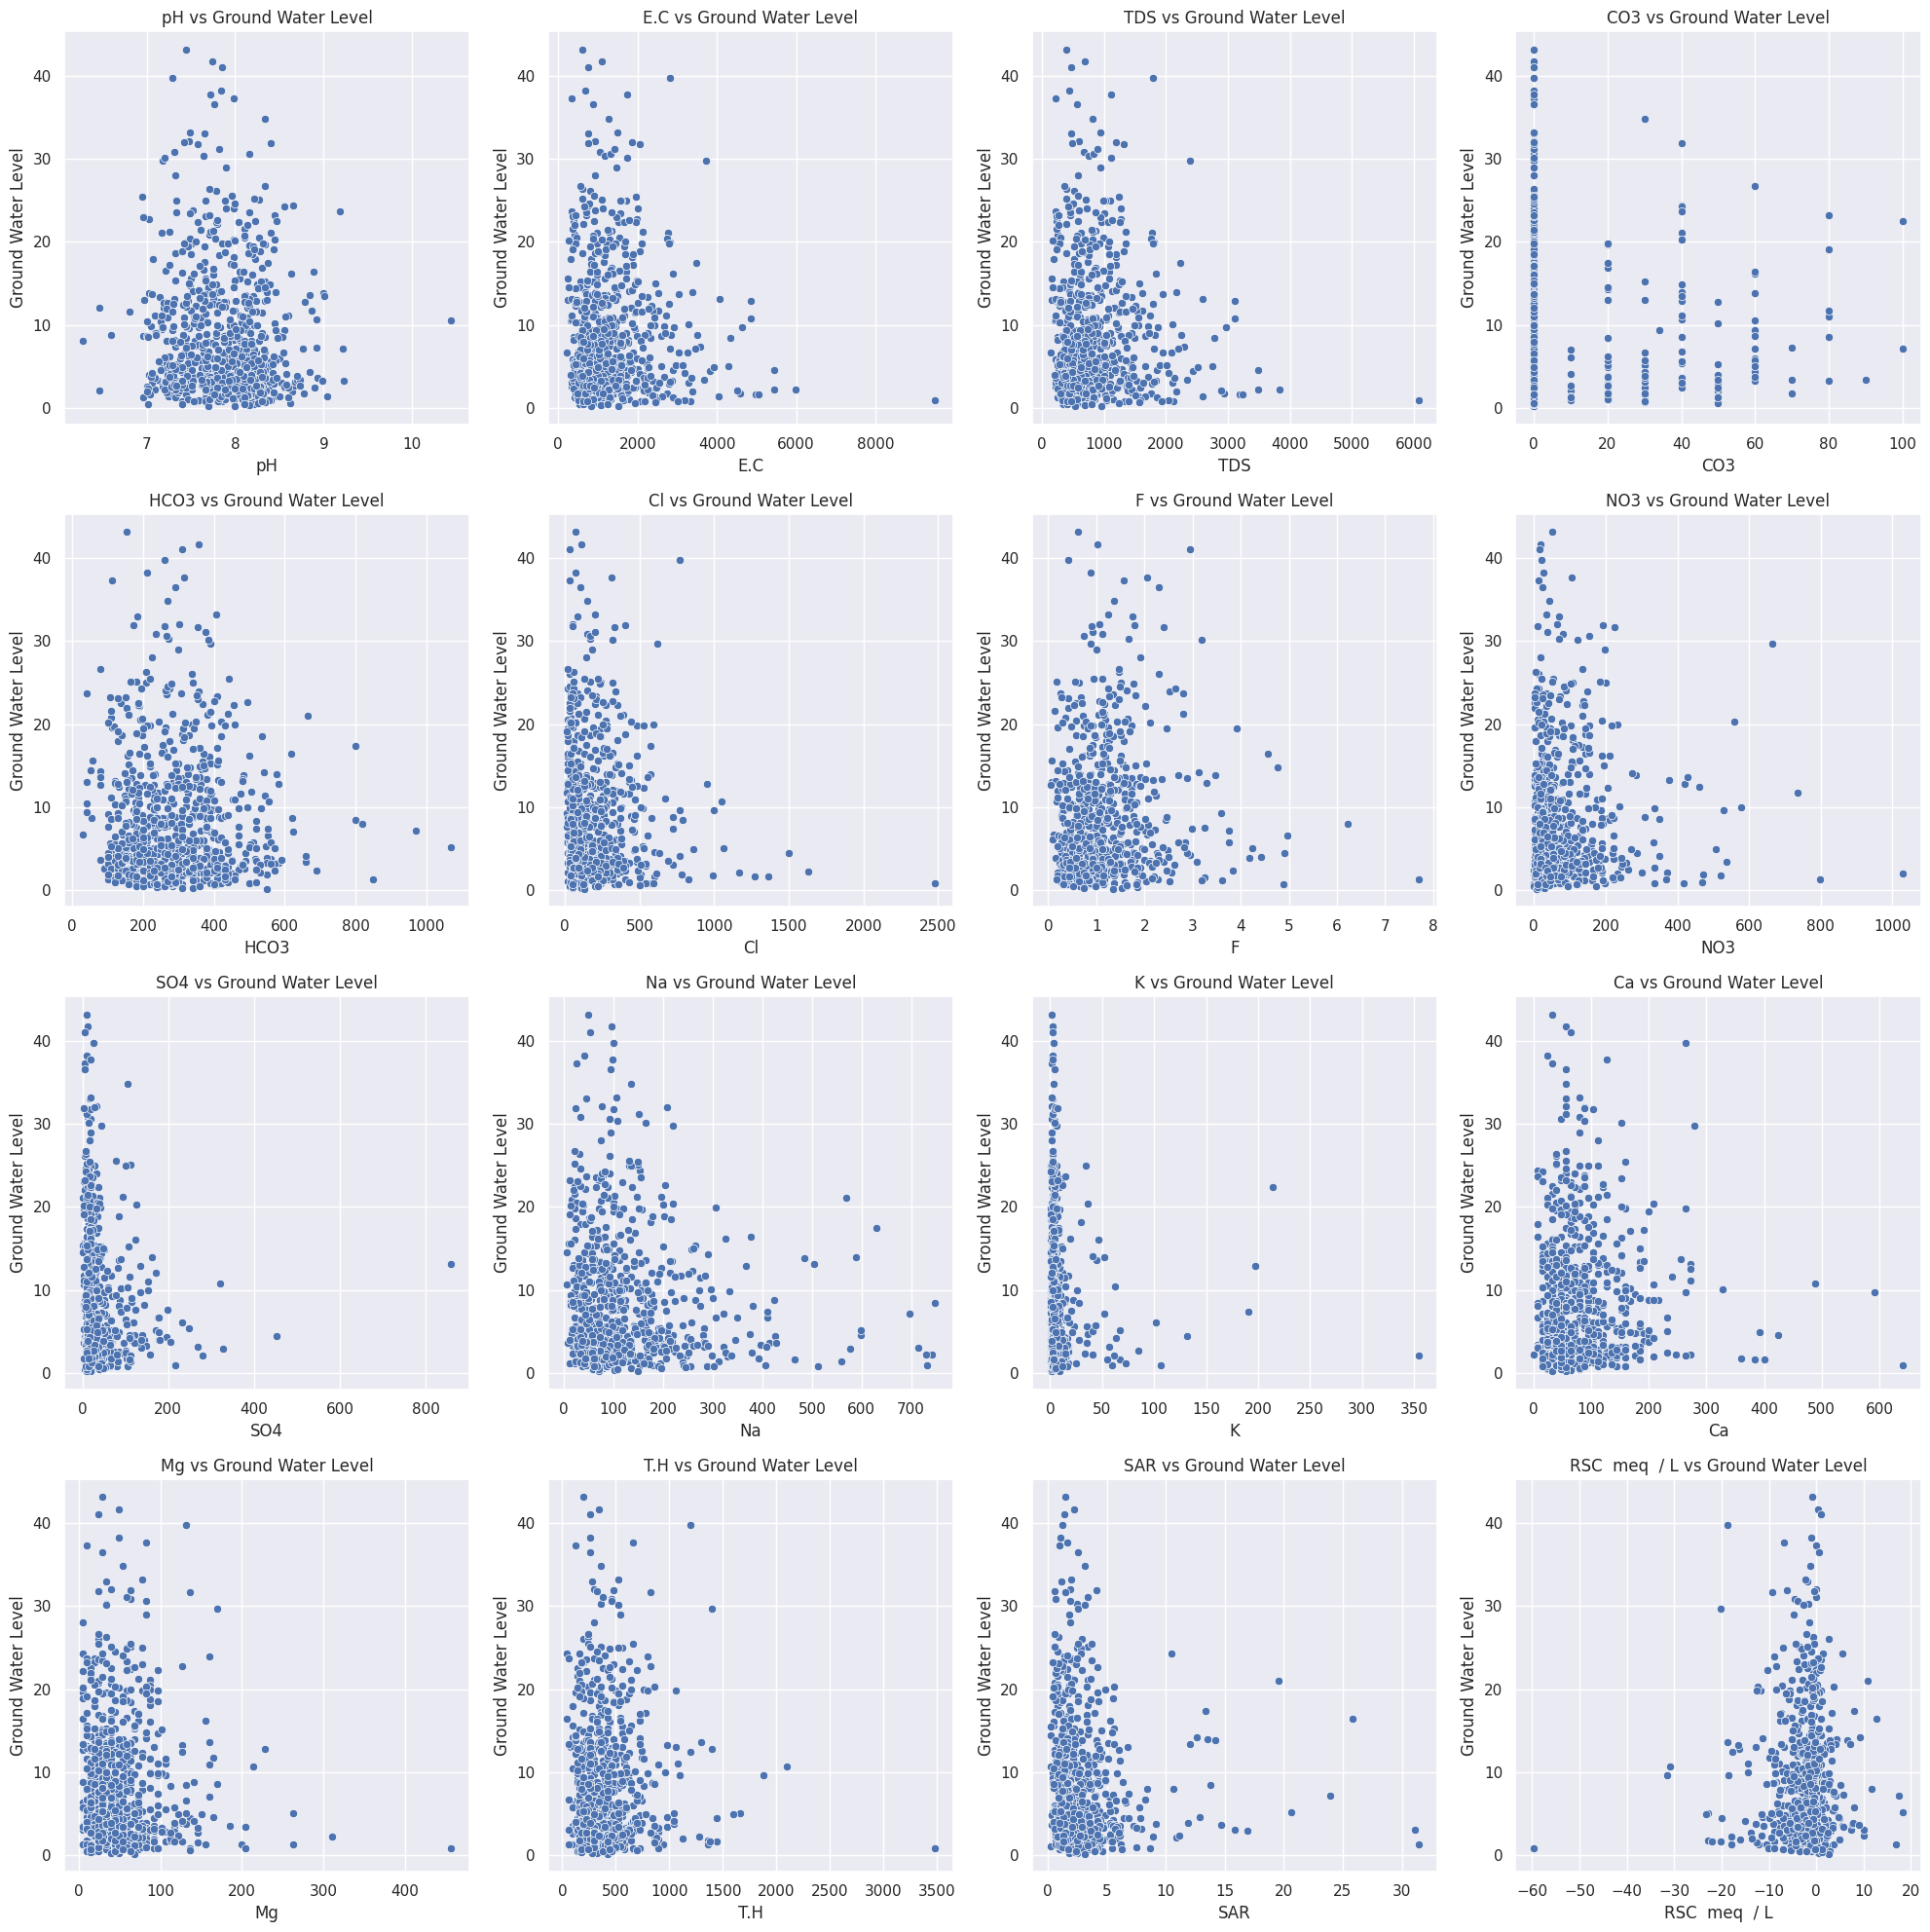

In [119]:
x_variables = ["pH", "E.C", "TDS", "CO3", 'HCO3', 'Cl', 'F', 'NO3', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L'] 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
x_vars_2d = [x_variables[i:i+4] for i in range(0, len(x_variables), 4)]
for i in range(4):
    for j in range(4):
        if i*4 + j < len(x_variables):
            x_var = x_vars_2d[i][j]
            sns.scatterplot(data=dataframe, x=x_var, y='gwl', ax=axes[i, j])
            axes[i, j].set_title(f'{x_var} vs Ground Water Level')
            axes[i, j].set_xlabel(x_var)
            axes[i, j].set_ylabel('Ground Water Level')

for i in range(len(x_variables), 4*4):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

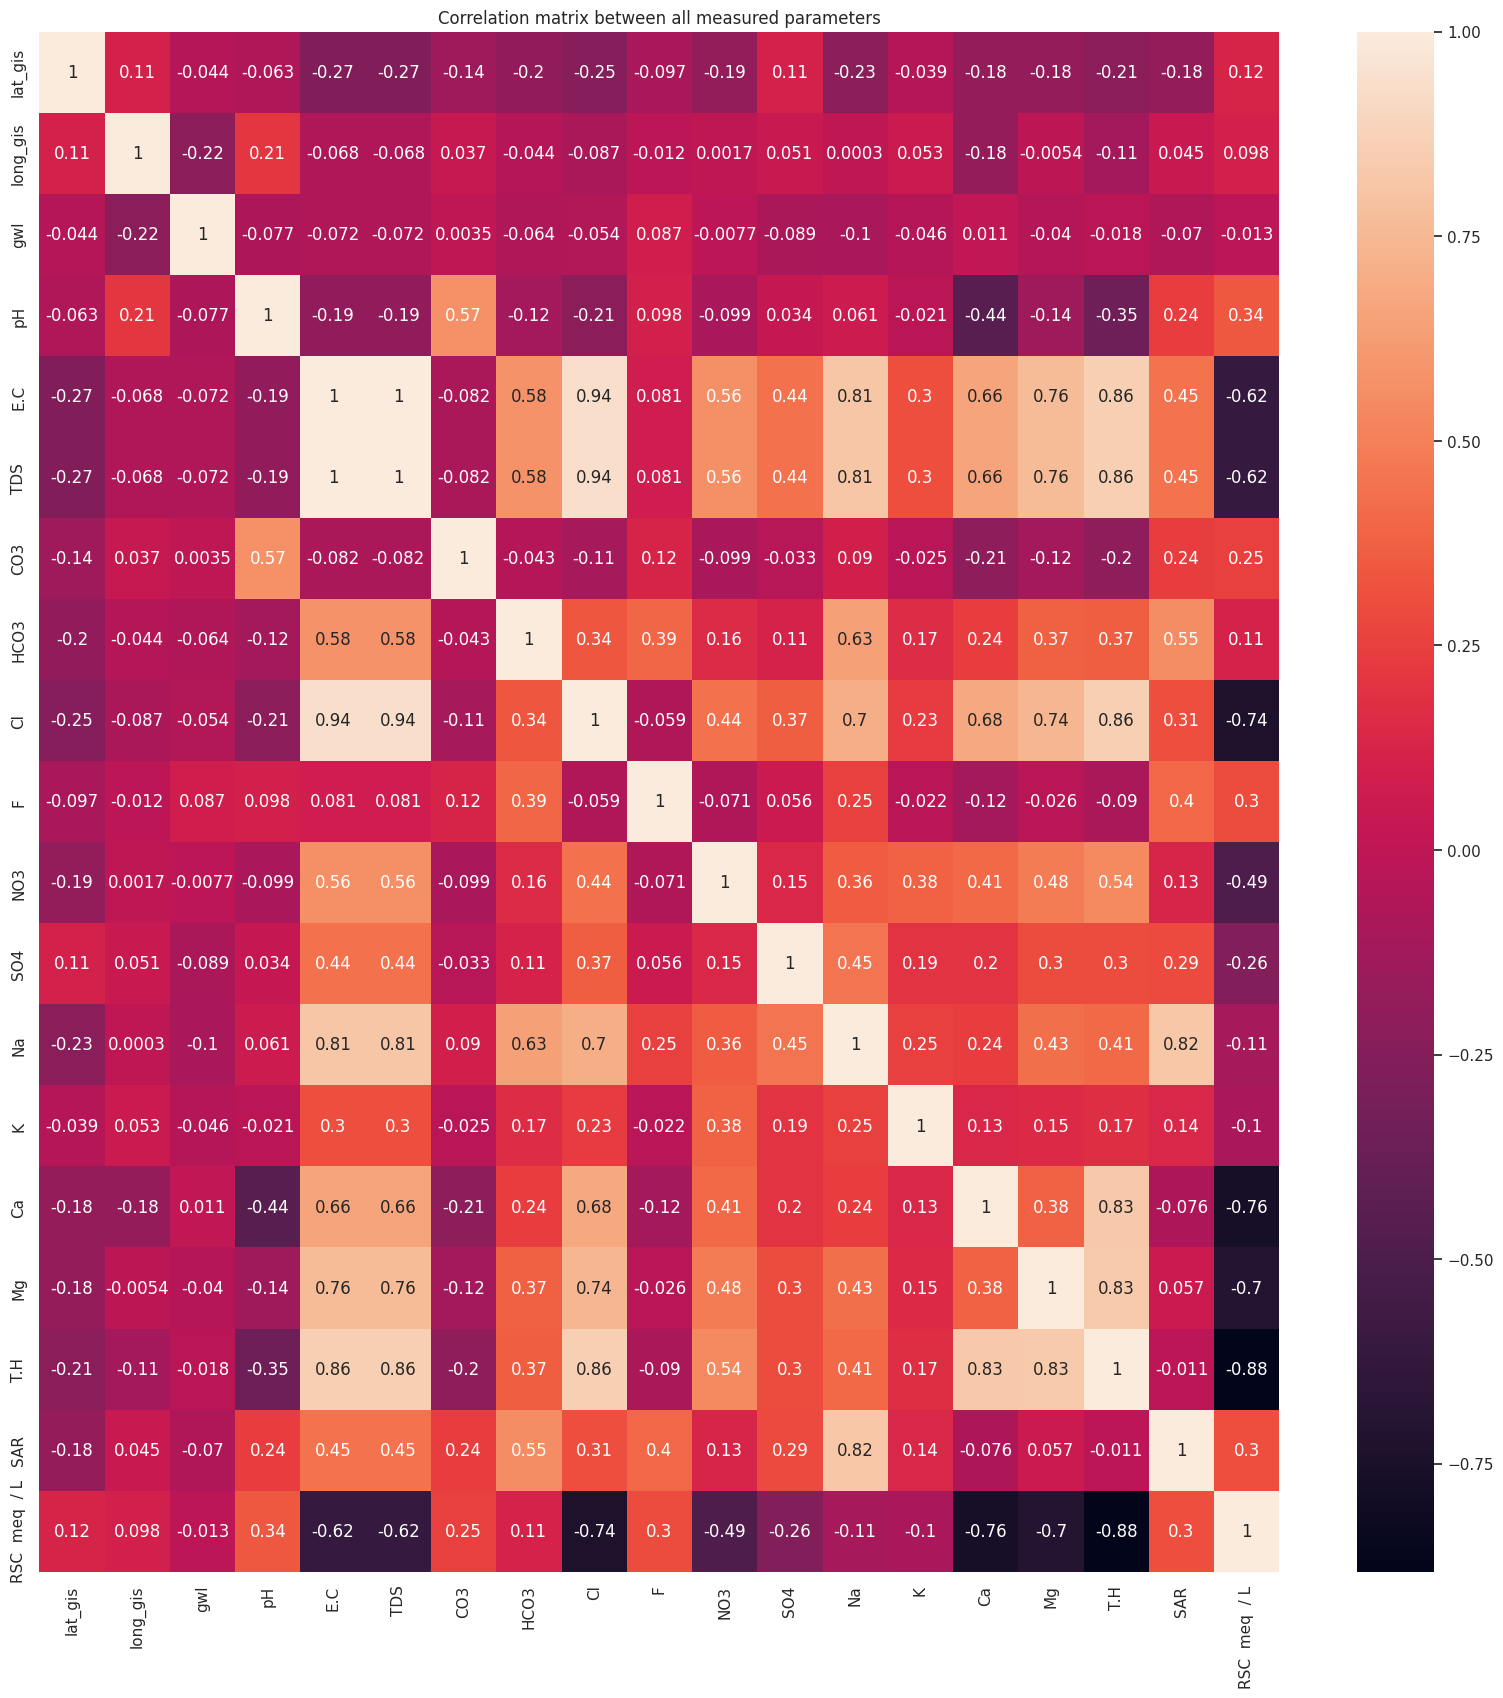

In [116]:
columns_to_drop = ['district', 'mandal', 'village', 'Classification', 'Classification.1']
dataframe_dropped = dataframe.drop(columns=columns_to_drop)
plt.figure(figsize=(20, 20))
plt.title("Correlation matrix between all measured parameters")
sns.heatmap(dataframe_dropped.corr(), annot=True);
plt.show()

In [117]:
# Define a function to map ranges to categories
def map_tds_range(value):
    if value < 1000:
        return 'excellent'
    elif 1000 <= value < 3000:
        return 'satisfactory'
    elif 3000 <= value < 5000:
        return 'satisfactory for livestock, unfirendly to birds'
    elif 5000 <= value < 7000:
        return 'limited use for livestock, not suitable for poultry'
    elif 7000 <= value < 10000:
        return 'limited use'
    elif value > 10000:
        return 'unrecommended'

# Apply the mapping function to create a new column with categories as values
dataframe['water_quality'] = dataframe['TDS'].apply(map_tds_range)
dataframe.head()

,district,mandal,village,lat_gis,long_gis,gwl,pH,E.C,TDS,CO3,...,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1,water_quality
0,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,8.28,745,476.80,0.0,...,49.0,4.0,48.0,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.,excellent
1,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,8.29,921,589.44,0.0,...,42.0,5.0,56.0,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.,excellent
2,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,7.69,510,326.40,0.0,...,45.0,2.0,24.0,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.,excellent
3,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,8.09,422,270.08,0.0,...,27.0,1.0,32.0,19.448,159.967105,0.928155,C2S1,0.000658,P.S.,excellent
4,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,8.21,2321,1485.44,0.0,...,298.0,5.0,56.0,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.,satisfactory


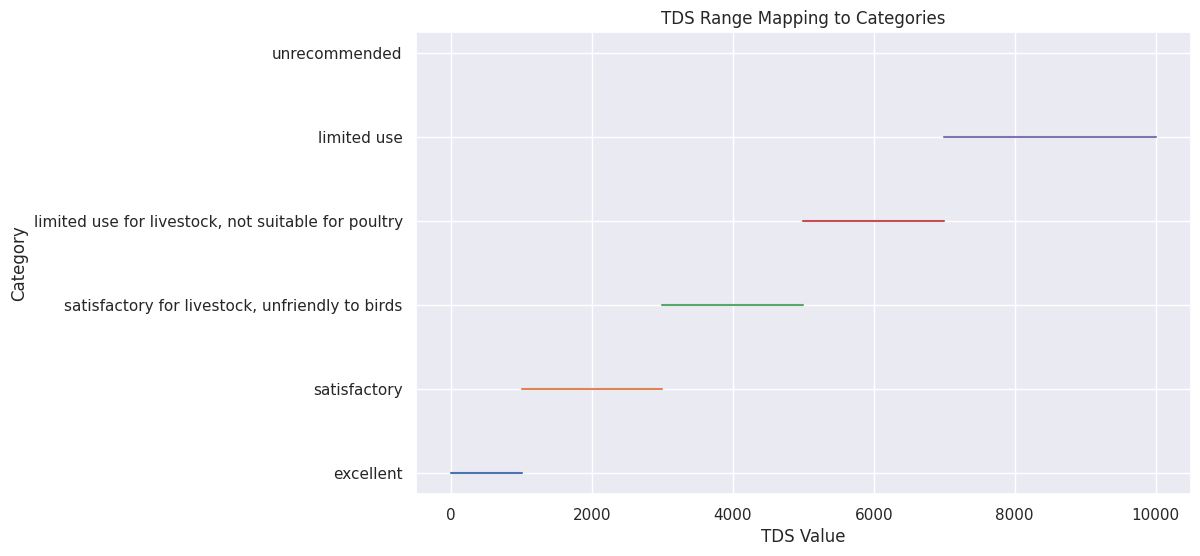

In [118]:
import matplotlib.pyplot as plt

# Define TDS ranges and corresponding categories
tds_ranges = [(0, 1000), (1000, 3000), (3000, 5000), (5000, 7000), (7000, 10000), (10000, float('inf'))]
categories = ['excellent', 'satisfactory', 'satisfactory for livestock, unfriendly to birds',
              'limited use for livestock, not suitable for poultry', 'limited use', 'unrecommended']

# Plot the mapping function
plt.figure(figsize=(10, 6))
for i, (start, end) in enumerate(tds_ranges):
    plt.plot([start, end], [i, i], label=categories[i])

plt.title('TDS Range Mapping to Categories')
plt.xlabel('TDS Value')
plt.ylabel('Category')
plt.yticks(range(len(categories)), categories)
plt.grid(True)
plt.show()
